# Load data

In [2]:
# Load packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# Load taxi and weather data
taxi_weather_data_raw = pd.read_csv("data/taxi_weather_data_raw.csv")

# Seek correlation

## correlation matrix (trip_dur and trip_dur_log)

In [11]:
corr_matrix = taxi_weather_data_raw.select_dtypes(include='number').corr()

In [12]:
corr_matrix['trip_duration'].sort_values(ascending=False)

trip_duration_min       1.000000
trip_duration           1.000000
trip_duration_log       0.260503
haversine_km            0.096961
pickup_longitude        0.026536
vendor_id               0.021246
dropoff_longitude       0.014961
passenger_count         0.009125
temp_class_code         0.007739
temp                    0.006996
temp_C                  0.006996
hour_of_year            0.006933
day_of_year_x           0.006911
day_of_year_y           0.006911
pickup_month            0.006833
hour_of_day             0.004393
pickup_hour_of_day      0.004393
windspeed_class_code    0.001781
windspeed_kph           0.001350
hazy_class_code         0.001151
windspeed               0.001143
rain_class_code         0.000917
precip_mm               0.000060
precip                  0.000060
precip_snow_mm         -0.000080
dailysnow              -0.000080
pressure               -0.000148
pressure_hPa           -0.000196
fog                    -0.000267
fog_class_code         -0.000267
rain      

- Not a strong predictor so far. Even distance is only weakly correlated
- No weather variable currently shows a significant linear correlation

In [13]:
corr_matrix['trip_duration_log'].sort_values(ascending=False)

trip_duration_log       1.000000
haversine_km            0.572367
trip_duration           0.260503
trip_duration_min       0.260503
pickup_longitude        0.109614
dropoff_longitude       0.071455
temp_C                  0.060105
temp                    0.060105
temp_class_code         0.057509
hour_of_year            0.046874
day_of_year_y           0.046674
day_of_year_x           0.046674
pickup_month            0.045425
pickup_hour_of_day      0.039088
hour_of_day             0.039088
passenger_count         0.021169
vendor_id               0.019825
hazy_class_code         0.005456
rain_class_code         0.000928
windspeed_class_code    0.000740
cloud_class_code       -0.000386
precip_mm              -0.000458
precip                 -0.000458
windspeed_kph          -0.000680
rain                   -0.002199
windspeed              -0.002488
fog                    -0.003048
fog_class_code         -0.003048
freezing_class_code    -0.003208
precip_snow_mm         -0.003917
dailysnow 

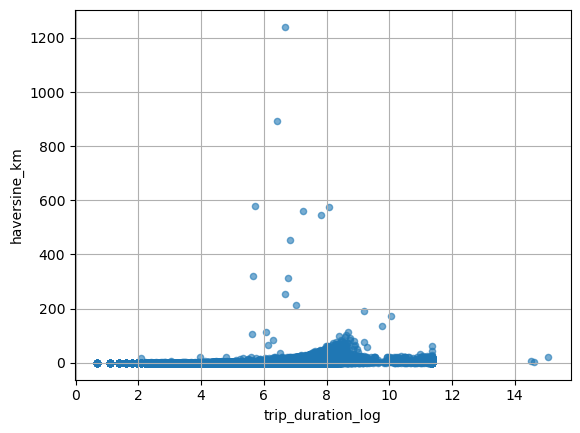

In [17]:
taxi_weather_data_raw.plot(kind="scatter", x="haversine_km", y="trip_duration_log", alpha=0.5,
                           grid=True)
plt.show()

- The log transformation of trip_duration has reduced the dispersion
- haversine_km - Strong correlation: longer distance → longer duration (logarithmically smoothed)
- pickup_longitude - Possible district effect
- Weather characteristics hardly show linear effects, they could have a non-linear effect or only be relevant at certain times or locations
- Geographical coordinates contribute significantly

## Filter haversine in combination

In [34]:
# Filter: nur Fahrten mit ≤ 10 km und Uhrzeit zwischen 7 und 9 Uhr
filtered = taxi_weather_data_raw[
    (taxi_weather_data_raw['haversine_km'] <= 10) &
    (taxi_weather_data_raw['pickup_hour_of_day'].between(7, 22))
]

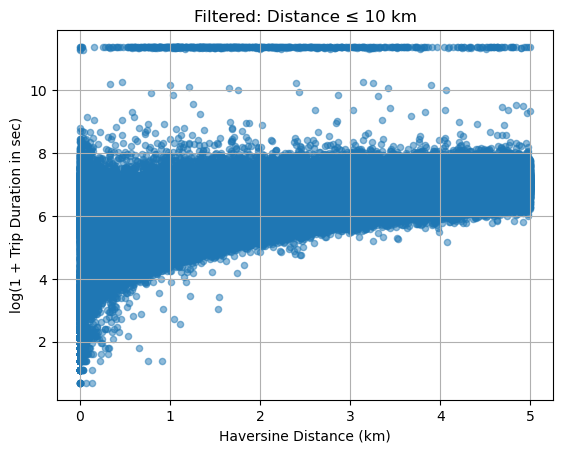

In [33]:
filtered.plot.scatter(x="haversine_km", y="trip_duration_log", alpha=0.5, grid=True)
plt.xlabel("Haversine Distance (km)")
plt.ylabel("log(1 + Trip Duration in sec)")
plt.title("Filtered: Distance ≤ 10 km")
plt.show()

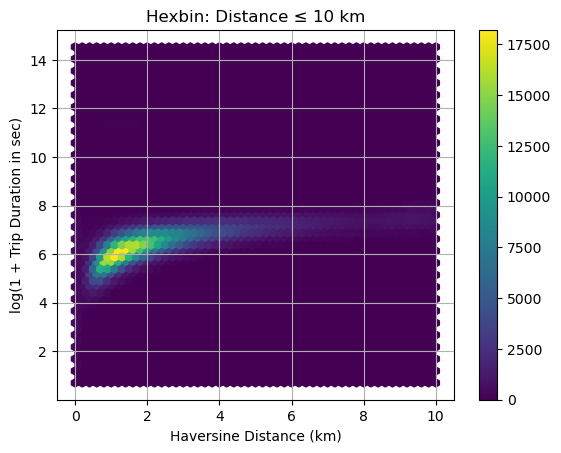

In [35]:
filtered.plot.hexbin(
    x="haversine_km", y="trip_duration_log",
    gridsize=50, cmap='viridis'
)
plt.xlabel("Haversine Distance (km)")
plt.ylabel("log(1 + Trip Duration in sec)")
plt.title("Hexbin: Distance ≤ 10 km")
plt.grid(True)
plt.show()